***Saksinkarn Petchkuljinda; 630510600***

## Euler's Number $e$: Definition

Recall that $e$ is defined as:

$$e = \lim_{n \to +\infty} \Big(1 + \frac{1}{n}\Big)^n$$

The expression can also be written as:

$$e = \lim_{n \to +\infty} \sum^n_{k=0} \frac{1}{k!}$$

First, let's look at the Julia's preloaded $e$ value.

In [2]:
MathConstants.e

ℯ = 2.7182818284590...

Or we can just type `\euler` then press tab for a couple of times, then we get the mathematical symbol for Euler's number.

In [3]:
ℯ

ℯ = 2.7182818284590...

Let's implement.

In [4]:
function def_e(n)
    sum = big(0.0)
    for k in 0:n
        sum += big(1.0) / factorial(big(k))
    end
    return sum
end

def_e (generic function with 1 method)

To make the best comparison, we will involve ChatGPT's $e$ value, as follows:

In [5]:
e_chatgpt = "2.718281828459045235360287471352662497757247093699959574966967627724076630353547"

"2.718281828459045235360287471352662497757247093699959574966967627724076630353547"

In [6]:
using Printf

In [7]:
@printf("Julia's ℯ   = %.78Lf\n", ℯ)
println("ChatGPT's ℯ = $e_chatgpt")
println("def_e(1)    = $(@time def_e(1))")
println("def_e(2)    = $(@time def_e(2))")
println("def_e(5)    = $(@time def_e(5))")
println("def_e(10)   = $(@time def_e(10))")
println("def_e(20)   = $(@time def_e(20))")
println("def_e(50)   = $(@time def_e(50))")
println("def_e(70)   = $(@time def_e(70))")
println("def_e(100)  = $(@time def_e(100))")
println("def_e(1000) = $(@time def_e(1000))")

Julia's ℯ   = 2.718281828459045090795598298427648842334747314453125000000000000000000000000000
ChatGPT's ℯ = 2.718281828459045235360287471352662497757247093699959574966967627724076630353547
  0.000080 seconds (22 allocations: 888 bytes)


def_e(1)    = 2.0


  0.000046 seconds (32 allocations: 1.250 KiB)


def_e(2)    = 2.5
  0.000038 seconds (62 allocations: 2.398 KiB)


def_e(5)    = 2.716666666666666666666666666666666666666666666666666666666666666666666666666706
  0.000028 seconds (112 allocations: 4.312 KiB)


def_e(10)   = 2.718281801146384479717813051146384479717813051146384479717813051146384479717852
  0.000040 seconds (212 allocations: 8.141 KiB)


def_e(20)   = 2.718281828459045235339784490666415886146403434540261720776551790178813437759646
  0.000111 seconds (575 allocations: 20.922 KiB)


def_e(50)   = 2.718281828459045235360287471352662497757247093699959574966967627723419298053383
  0.000112 seconds (826 allocations: 30.133 KiB)


def_e(70)   = 2.718281828459045235360287471352662497757247093699959574966967627724076630353416
  0.000199 seconds (1.22 k allocations: 45.172 KiB)


def_e(100)  = 2.718281828459045235360287471352662497757247093699959574966967627724076630353416
  0.005470 seconds (13.72 k allocations: 1.318 MiB)


def_e(1000) = 2.718281828459045235360287471352662497757247093699959574966967627724076630353416


Let's explore an alternative method to approximate $e$.

## Computational Definition

In our case, we will use the following method from [Wikipedia](https://en.wikipedia.org/wiki/E_(mathematical_constant)#Computing_the_digits) to approximate $e$.

Given two recursive function $p\big(a, b\big)$ and $q\big(a, b\big)$, defined as the following:

$$
\binom{p\big(a, b\big)}{q\big(a, b\big)} = 
\begin{cases}
\binom{1}{b} & \text{if } b = a + 1, \\
\binom{p(a, m)q(m, b) + p(m, b)}{q(a, m)q(m, b)} & \text{otherwise, where } m = \lfloor (a+b)/2 \rfloor
\end{cases}
$$

And for some positive integer $n \geq 1$, we get:

$$
e = 1 + \frac{p(0, n)}{q(0, n)}
$$

The greater value of $n$, the more precision you can get.

## Implementation

To prevent stack overflow, dynamic programming should be implemented for every possible value of $p$ and $q$.

In our case, we will only limit the value for up to $n = 1000$.

In [8]:
dp::Dict{Tuple{Int, Int, Int}, BigFloat} = Dict{Tuple{Int, Int, Int}, BigFloat}()

Dict{Tuple{Int64, Int64, Int64}, BigFloat}()

Use the definition above to define our function.

In [9]:
function pq(a::Int, b::Int)
    # println("a=$a, b=$b")
    if haskey(dp, (1, a + 1, b + 1))
        return dp[1, a + 1, b + 1], dp[2, a + 1, b + 1]
    elseif b == a + 1
        dp[1, a + 1, b + 1] = big(1.0)  # p
        dp[2, a + 1, b + 1] = BigFloat(b)  # q
    else
        m = (a + b) ÷ 2
        pam, qam = pq(a, m)
        pmb, qmb = pq(m, b)
        dp[1, a + 1, b + 1] = BigFloat(pam * qmb + pmb)  # p
        dp[2, a + 1, b + 1] = BigFloat(qam * qmb)  # q
    end
    return dp[1, a + 1, b + 1], dp[2, a + 1, b + 1]  # p, q
end

function approx_e(n::Int)::BigFloat
    p, q = pq(0, n)
    return big(1.0) + p / q
end

approx_e (generic function with 1 method)

## Test

We will compare our implemented method with the other two values.

- Julia's built-in $e$ constant
- ChatGPT's 78 decimal-place $e$ constant

In [10]:
using Printf

In [11]:
e_chatgpt = "2.718281828459045235360287471352662497757247093699959574966967627724076630353547"

"2.718281828459045235360287471352662497757247093699959574966967627724076630353547"

In [12]:
@printf("Julia's ℯ      = %.78Lf\n", ℯ)
println("ChatGPT's ℯ    = $e_chatgpt")
println("approx_e(1)    = $(@time approx_e(1))")
println("approx_e(2)    = $(@time approx_e(2))")
println("approx_e(5)    = $(@time approx_e(5))")
println("approx_e(10)   = $(@time approx_e(10))")
println("approx_e(20)   = $(@time approx_e(20))")
println("approx_e(50)   = $(@time approx_e(50))")
println("approx_e(70)   = $(@time approx_e(70))")
println("approx_e(100)  = $(@time approx_e(100))")
println("approx_e(1000) = $(@time approx_e(1000))")

Julia's ℯ      = 2.718281828459045090795598298427648842334747314453125000000000000000000000000000
ChatGPT's ℯ    = 2.718281828459045235360287471352662497757247093699959574966967627724076630353547
  0.000058 seconds (10 allocations: 520 bytes)


approx_e(1)    = 2.0
  0.000028 seconds (16 allocations: 832 bytes)


approx_e(2)    = 2.5
  0.000033 seconds (39 allocations: 4.109 KiB)


approx_e(5)    = 2.716666666666666666666666666666666666666666666666666666666666666666666666666671
  0.000054 seconds (56 allocations: 2.844 KiB)


approx_e(10)   = 2.718281801146384479717813051146384479717813051146384479717813051146384479717817
  0.000041 seconds (109 allocations: 13.961 KiB)


approx_e(20)   = 2.718281828459045235339784490666415886146403434540261720776551790178813437759646
  0.000081 seconds (406 allocations: 53.648 KiB)


approx_e(50)   = 2.718281828459045235360287471352662497757247093699959574966967627723419298053556
  0.000075 seconds (440 allocations: 22.344 KiB)


approx_e(70)   = 2.718281828459045235360287471352662497757247093699959574966967627724076630353555
  0.000098 seconds (414 allocations: 21.023 KiB)


approx_e(100)  = 2.718281828459045235360287471352662497757247093699959574966967627724076630353555
  0.000969 seconds (9.41 k allocations: 1.111 MiB)


approx_e(1000) = 2.718281828459045235360287471352662497757247093699959574966967627724076630353555


Visually comparing with eyes, we can see that our approximation are more close to ChatGPT's approximation. And only the maximum $n = 70$ is enough to reach the best approximation of $e$ within the precision of `BigFloat`.

Moreover, the binary split method is also faster in the long run (probably because we implemented the dynamic programming)

However, it is important to note that:

In [13]:
println("ChatGPT's string ℯ   = $e_chatgpt")
println("ChatGPT's BigFloat ℯ = $(BigFloat("2.718281828459045235360287471352662497757247093699959574966967627724076630353547"))")
println("approx_e(100)        = $(approx_e(100))")

ChatGPT's string ℯ   = 2.718281828459045235360287471352662497757247093699959574966967627724076630353547


ChatGPT's BigFloat ℯ = 2.718281828459045235360287471352662497757247093699959574966967627724076630353555
approx_e(100)        = 2.718281828459045235360287471352662497757247093699959574966967627724076630353555


ChatGPT's result, when it comes to the `BigFloat` representation of Euler's number, can still be distorted, so comparing loss trend in the following sections can be less than the actual.

## Plot the approximation trend of $e$ against $n$

We will compare the result from both the definition and the computational method.

In [14]:
using Plots

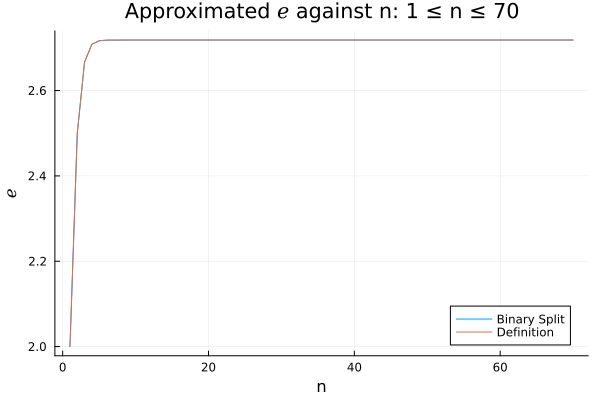

In [15]:
n = 1:70
e1 = [approx_e(k) for k in n]
e2 = [def_e(k) for k in n]

plot(
    n,
    e1,
    title="Approximated ℯ against n: 1 ≤ n ≤ 70",
    xlabel="n",
    ylabel="ℯ",
    label="Binary Split",
)
plot!(n, e2, label="Definition")

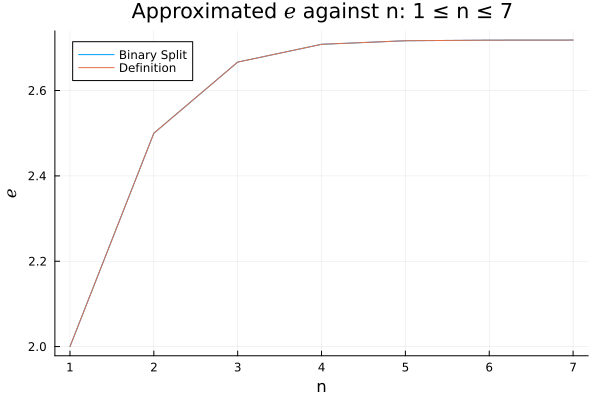

In [16]:
n = 1:7
e1 = [approx_e(k) for k in n]
e2 = [def_e(k) for k in n]

plot(
    n,
    e1,
    title="Approximated ℯ against n: 1 ≤ n ≤ 7",
    xlabel="n",
    ylabel="ℯ",
    label="Binary Split",
)
plot!(n, e2, label="Definition")

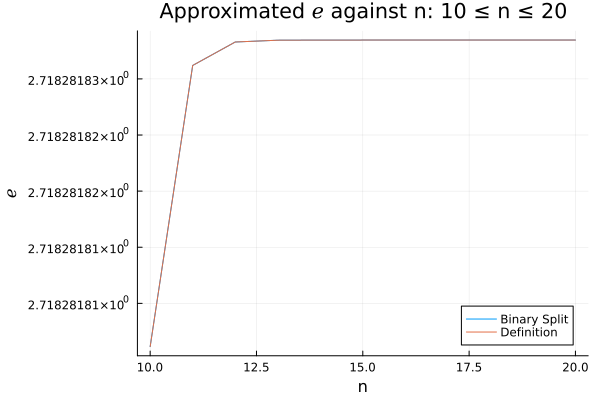

In [17]:
n = 10:20
e1 = [approx_e(k) for k in n]
e2 = [def_e(k) for k in n]

plot(n, e1, title="Approximated ℯ against n: 10 ≤ n ≤ 20", xlabel="n", ylabel="ℯ", label="Binary Split")
plot!(n, e2, label="Definition")

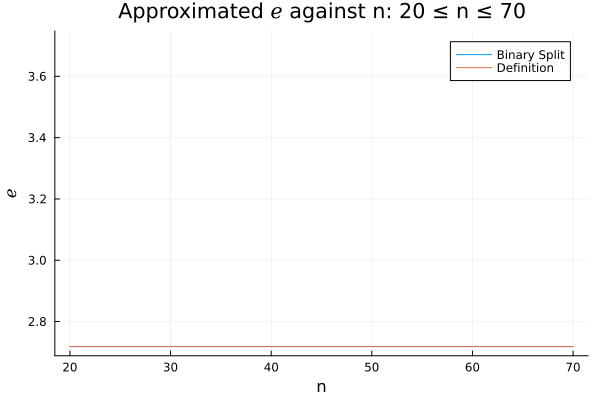

In [18]:
n = 20:70
e1 = [approx_e(k) for k in n]
e2 = [def_e(k) for k in n]

plot(n, e1, title="Approximated ℯ against n: 20 ≤ n ≤ 70", xlabel="n", ylabel="ℯ", label="Binary Split")
plot!(n, e2, label="Definition")

From the last plot, it can be inferred that the different among $n$ where $20 \leq n \leq 100$ is obviously trivial.

## Plot the loss of approximated $e$ compared to ChatGPT's $e$

In [19]:
bigfloat_e_chatgpt = BigFloat(e_chatgpt)

2.718281828459045235360287471352662497757247093699959574966967627724076630353555

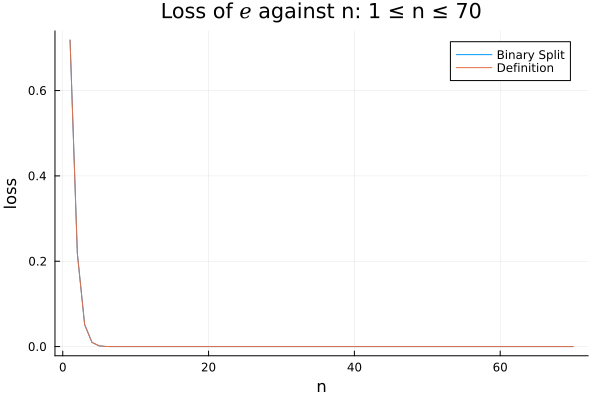

In [20]:
n = 1:70
e1 = [abs(approx_e(k) - bigfloat_e_chatgpt) for k in n]
e2 = [abs(def_e(k) - bigfloat_e_chatgpt) for k in n]

plot(n, e1, title="Loss of ℯ against n: 1 ≤ n ≤ 70", xlabel="n", ylabel="loss", label="Binary Split")
plot!(n, e2, label="Definition")

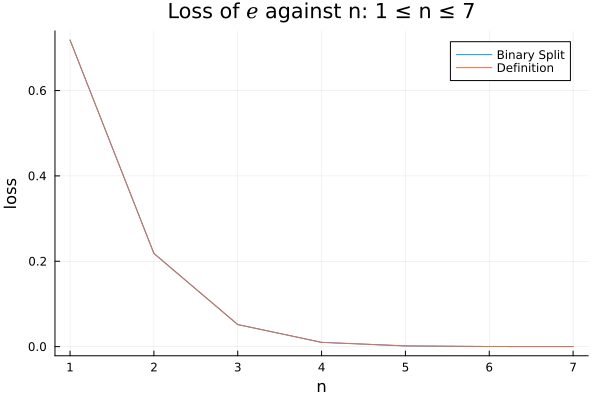

In [21]:
n = 1:7
e1 = [abs(approx_e(k) - bigfloat_e_chatgpt) for k in n]
e2 = [abs(def_e(k) - bigfloat_e_chatgpt) for k in n]

plot(n, e1, title="Loss of ℯ against n: 1 ≤ n ≤ 7", xlabel="n", ylabel="loss", label="Binary Split")
plot!(n, e2, label="Definition")

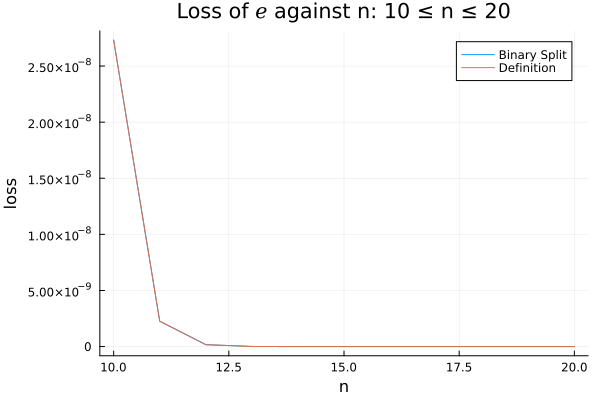

In [22]:
n = 10:20
e1 = [abs(approx_e(k) - bigfloat_e_chatgpt) for k in n]
e2 = [abs(def_e(k) - bigfloat_e_chatgpt) for k in n]

plot(n, e1, title="Loss of ℯ against n: 10 ≤ n ≤ 20", xlabel="n", ylabel="loss", label="Binary Split")
plot!(n, e2, label="Definition")

In [23]:
n = 20:70
e1 = [abs(approx_e(k) - bigfloat_e_chatgpt) for k in n]
e2 = [abs(def_e(k) - bigfloat_e_chatgpt) for k in n]

plot(n, e1, title="Loss of ℯ against n: 20 ≤ n ≤ 70", xlabel="n", ylabel="loss", , label="Binary Split")
plot!(n, e2, label="Definition")

LoadError: syntax: unexpected ","

We can conclude that the binary split method and the definition are not different in terms of accuracy.